In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


df_cells = pd.read_excel('Cell_Lines_Details.xlsx')
df_compounds = pd.read_csv('Compounds-annotation.csv')
df_gdsc1 = pd.read_csv('GDSC_DATASET.csv')
df_gdsc2 = pd.read_csv('GDSC2-dataset.csv')

df_cells.rename(columns={'COSMIC identifier': 'COSMIC_ID'}, inplace=True)
df_gdsc1.rename(columns={'COSMIC': 'COSMIC_ID'}, inplace=True)

df_gdsc_combined = pd.concat([df_gdsc1, df_gdsc2], ignore_index=True)

merged_df = pd.merge(df_gdsc_combined, df_cells, on='COSMIC_ID', how='inner')
merged_df = pd.merge(merged_df, df_compounds, on='DRUG_ID', how='inner')

print("dataset size:", merged_df.shape)
print(merged_df.head())

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


dataset size: (484071, 47)
   COSMIC_ID CELL_LINE_NAME     TCGA_DESC  DRUG_ID   DRUG_NAME_x   LN_IC50  \
0     683667         PFSK-1            MB     1003  Camptothecin -1.463887   
1     684057            ES5  UNCLASSIFIED     1003  Camptothecin -3.360586   
2     684059            ES7  UNCLASSIFIED     1003  Camptothecin -5.044940   
3     684062          EW-11  UNCLASSIFIED     1003  Camptothecin -3.741991   
4     684072        SK-ES-1  UNCLASSIFIED     1003  Camptothecin -5.142961   

        AUC   Z_SCORE GDSC Tissue descriptor 1 GDSC Tissue descriptor 2  ...  \
0  0.930220  0.433123           nervous_system          medulloblastoma  ...   
1  0.791072 -0.599569                     bone           ewings_sarcoma  ...   
2  0.592660 -1.516647                     bone           ewings_sarcoma  ...   
3  0.734047 -0.807232                     bone           ewings_sarcoma  ...   
4  0.582439 -1.570016                     bone           ewings_sarcoma  ...   

  GDSC\nTissue\ndescrip

In [2]:
merged_df_clean = merged_df.drop_duplicates(subset=['COSMIC_ID', 'DRUG_ID'])
print("dataset size:", merged_df_clean.shape)

dataset size: (242036, 47)


In [3]:
cols_to_drop = [
    'DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'SANGER_MODEL_ID',
    'PUTATIVE_TARGET', 'PATHWAY_NAME', 'COMPANY_ID', 'WEBRELEASE',
    'MIN_CONC', 'MAX_CONC', 'RMSE'
]

merged_df_clean = merged_df_clean.drop(columns=cols_to_drop, errors='ignore')
print("After dropping almost-empty columns:", merged_df_clean.shape)

After dropping almost-empty columns: (242036, 36)


In [4]:
merged_df_clean.rename(columns={
    'Drug\nResponse': 'Drug_Response',
    'GDSC\nTissue descriptor 1': 'GDSC_Tissue_Descriptor_1',
    'GDSC\nTissue\ndescriptor 2': 'GDSC_Tissue_Descriptor_2',
    'Cancer Type\n(matching TCGA label)': 'Cancer_Type_TCGA_Label',
    'Microsatellite \ninstability Status (MSI)': 'MSI_Status'
}, inplace=True)

print(merged_df_clean.columns)

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME_x',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium_x',
       'Growth Properties_x', 'CNA', 'Gene Expression_x', 'Methylation_x',
       'TARGET_x', 'TARGET_PATHWAY_x', 'Sample Name',
       'Whole Exome Sequencing (WES)', 'Copy Number Alterations (CNA)',
       'Gene Expression_y', 'Methylation_y', 'Drug_Response',
       'GDSC_Tissue_Descriptor_1', 'GDSC_Tissue_Descriptor_2',
       'Cancer_Type_TCGA_Label', 'MSI_Status', 'Screen Medium_y',
       'Growth Properties_y', 'SCREENING_SITE', 'DRUG_NAME_y', 'SYNONYMS',
       'TARGET_y', 'TARGET_PATHWAY_y'],
      dtype='object')


In [5]:
print("Missing values per column:")
print(merged_df_clean.isnull().sum())

Missing values per column:
COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME_x                                    0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9367
GDSC Tissue descriptor 2                    9367
Cancer Type (matching TCGA label)          51447
Microsatellite instability Status (MSI)    12354
Screen Medium_x                             9367
Growth Properties_x                         9367
CNA                                         9367
Gene Expression_x                           9367
Methylation_x                               9367
TARGET_x                                   27156
TARGET_PATHWAY_x                               1
Sample Name                               

In [6]:
# Save the final cleaned dataset
merged_df_clean.to_csv('final_merged_dataset.csv', index=False)

Missing values in percentage:
SYNONYMS                                   26.371284
Cancer Type (matching TCGA label)          21.255929
Cancer_Type_TCGA_Label                     17.977904
TARGET_x                                   11.219819
TARGET_y                                   11.219405
Microsatellite instability Status (MSI)     5.104199
Screen Medium_x                             3.870085
GDSC Tissue descriptor 2                    3.870085
Gene Expression_x                           3.870085
Methylation_x                               3.870085
Growth Properties_x                         3.870085
GDSC Tissue descriptor 1                    3.870085
CNA                                         3.870085
MSI_Status                                  1.234114
TCGA_DESC                                   0.440844
TARGET_PATHWAY_x                            0.000413
DRUG_ID                                     0.000000
CELL_LINE_NAME                              0.000000
COSMIC_ID       

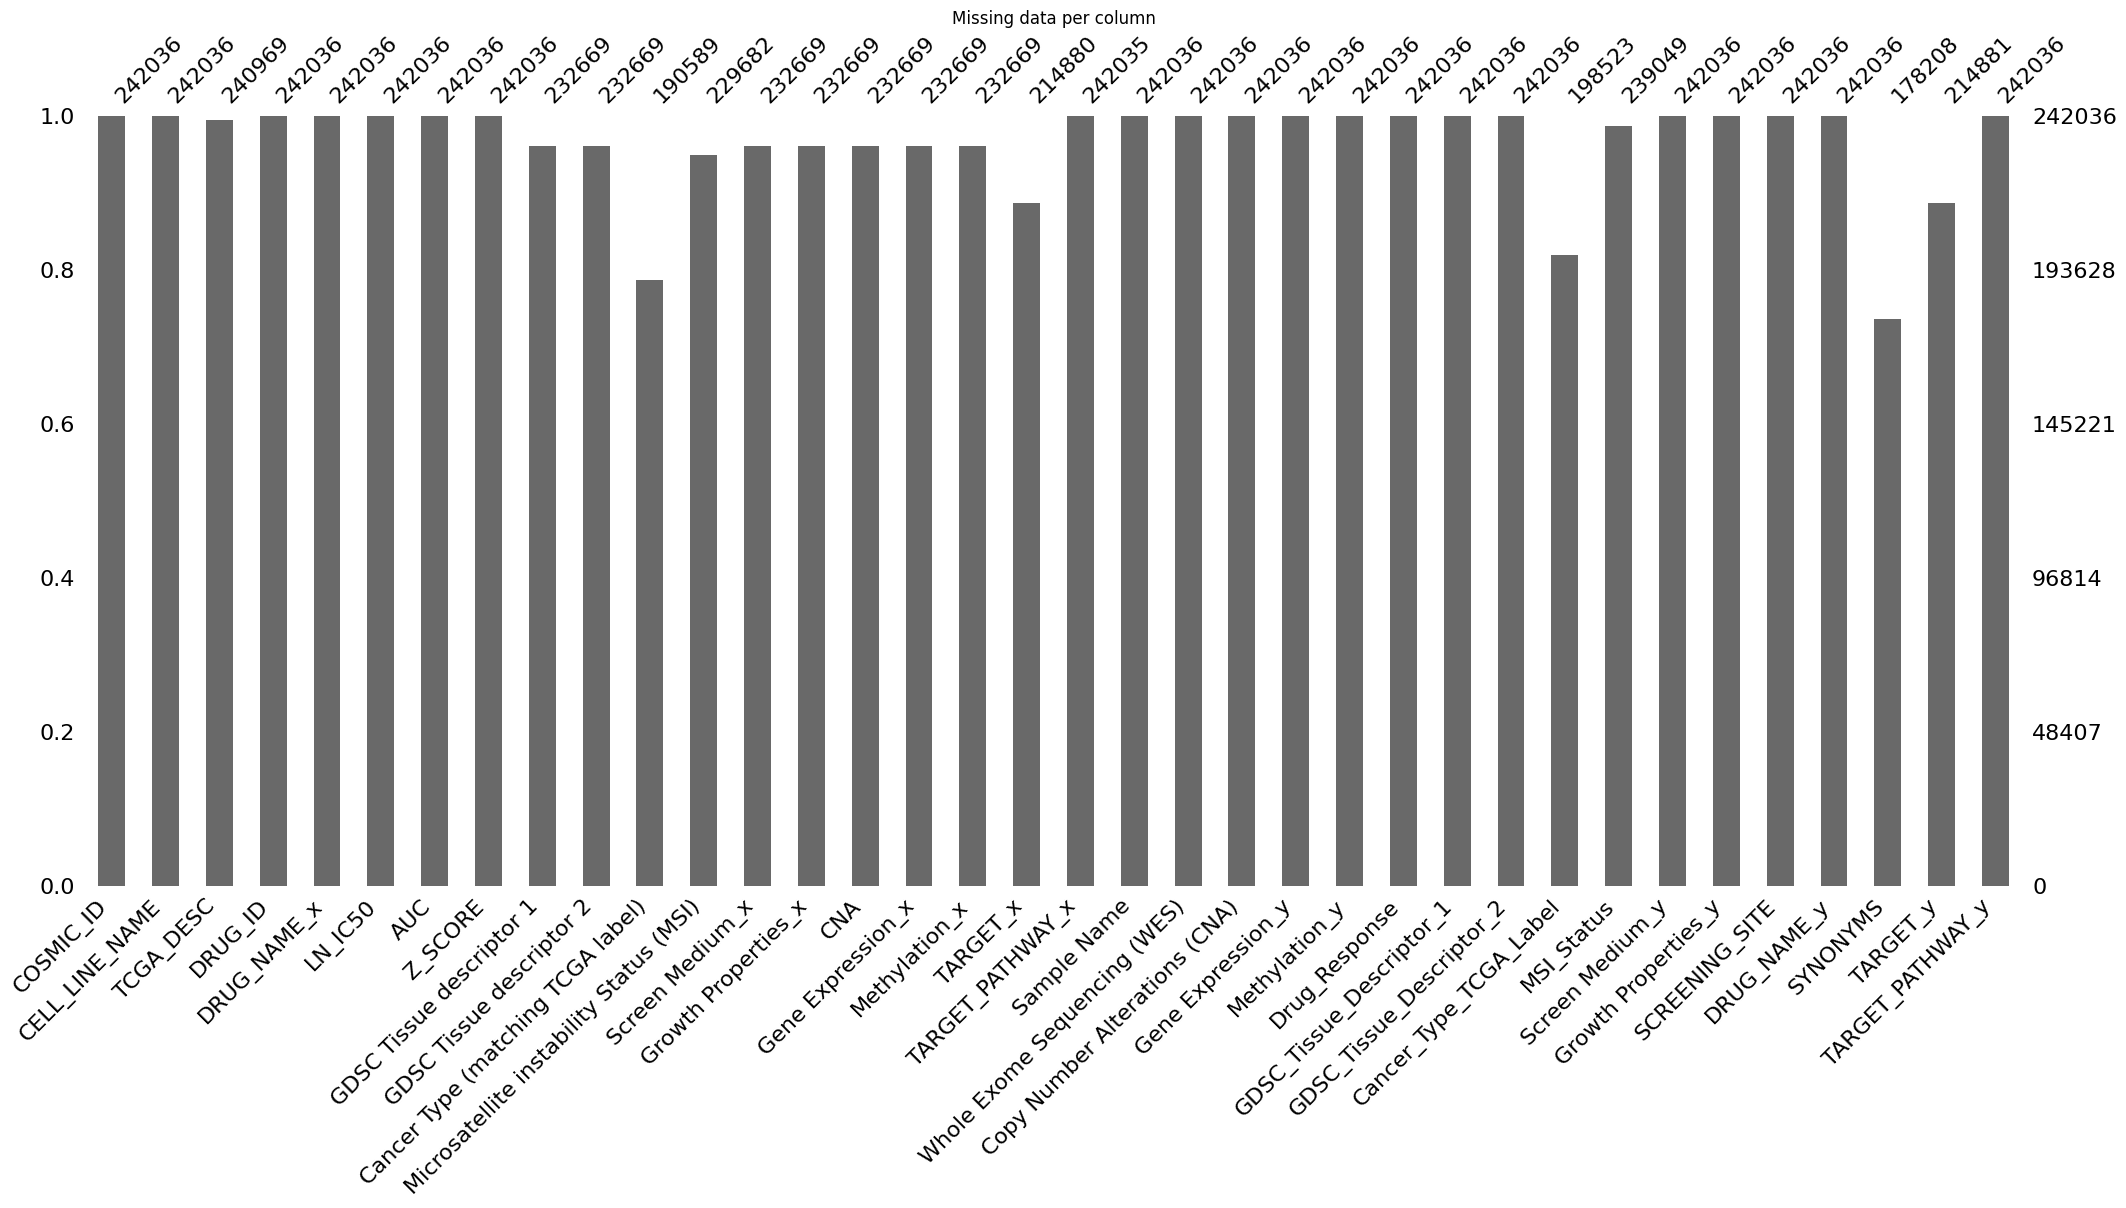

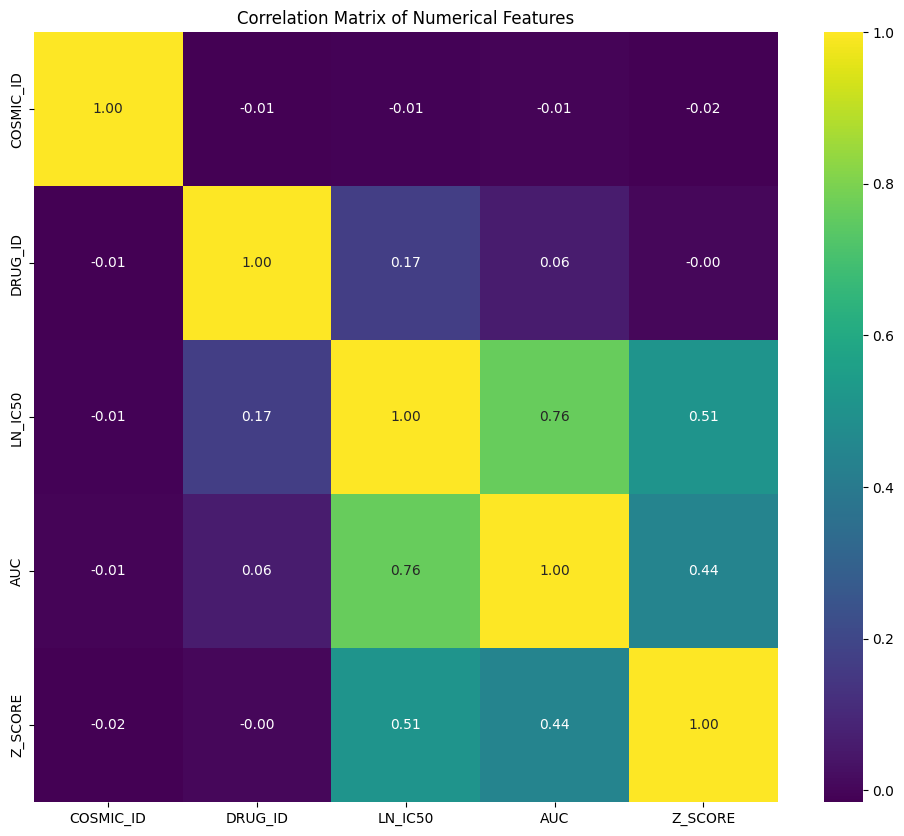

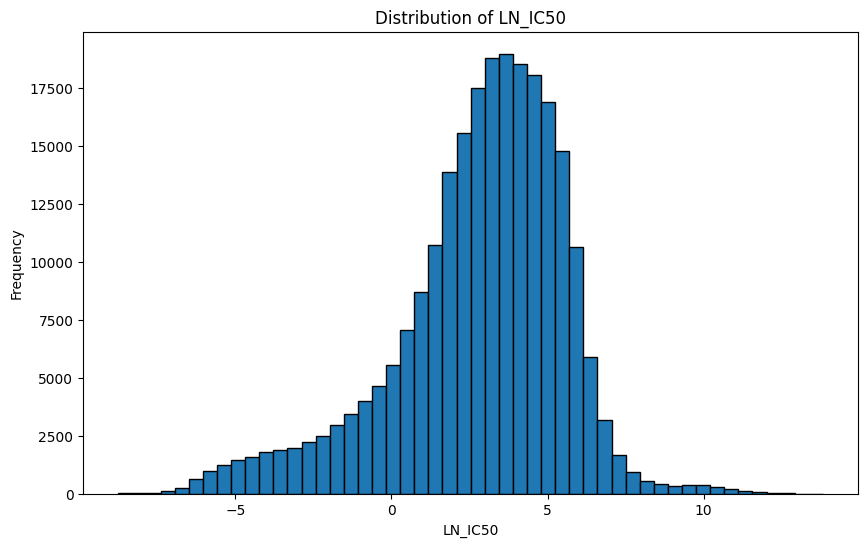

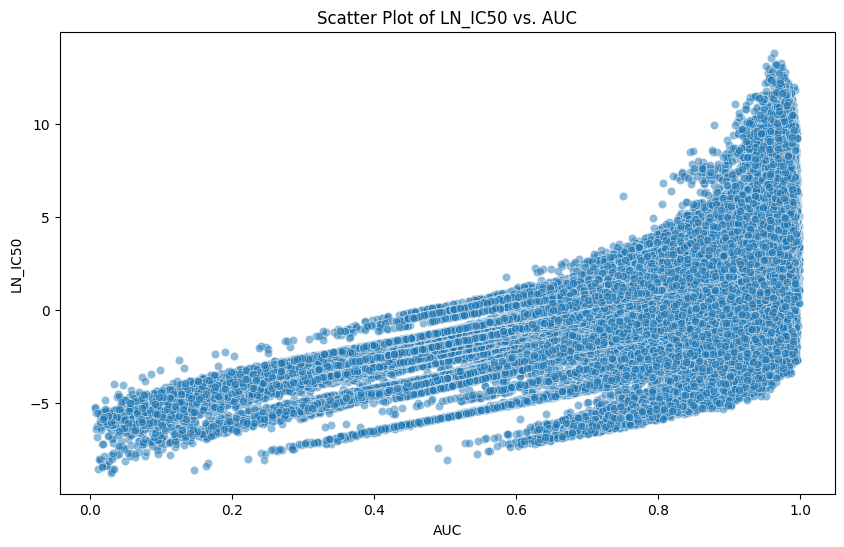

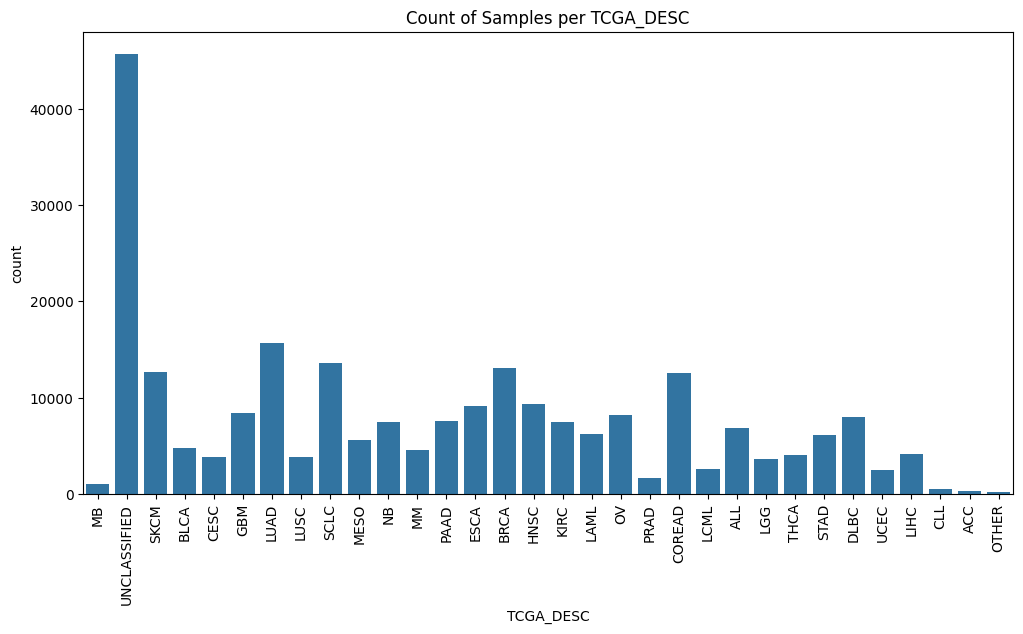

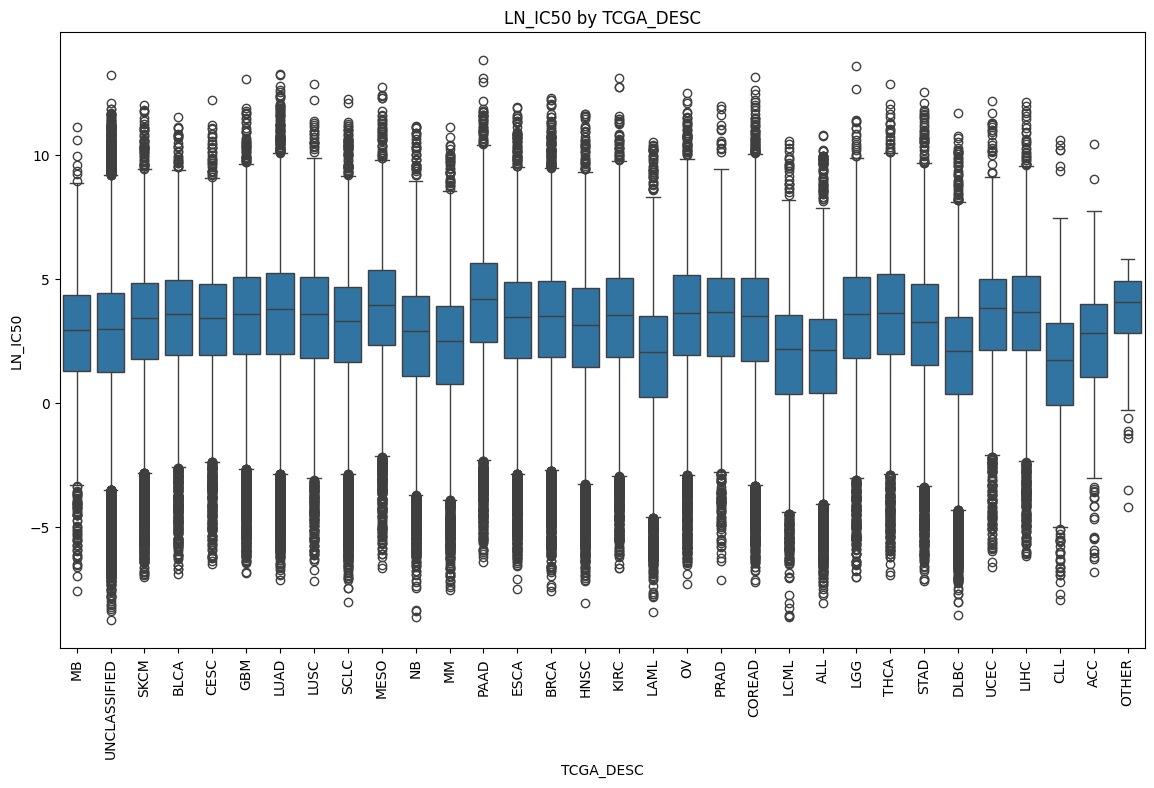

In [7]:
df = pd.read_csv('final_merged_dataset.csv')

# Missing values
missing_percent = df.isnull().mean() * 100
print("Missing values in percentage:")
print(missing_percent.sort_values(ascending=False))

# Visualize missing data pattern
plt.figure(figsize=(12,6))
msno.bar(df)
plt.title('Missing data per column')
plt.show()

# Correlation matrix for numerical features
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Distribution of LN_IC50
plt.figure(figsize=(10, 6))
plt.hist(df['LN_IC50'].dropna(), bins=50, edgecolor='black')
plt.xlabel('LN_IC50')
plt.ylabel('Frequency')
plt.title('Distribution of LN_IC50')
plt.show()

# Scatter plot of LN_IC50 vs. AUC
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='AUC', y='LN_IC50', alpha=0.5)
plt.title('Scatter Plot of LN_IC50 vs. AUC')
plt.show()

if 'TCGA_DESC' in df.columns:
    # Count of samples per TCGA_DESC
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='TCGA_DESC')
    plt.xticks(rotation=90)
    plt.title('Count of Samples per TCGA_DESC')
    plt.show()

    # Boxplot of LN_IC50 by TCGA_DESC
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='TCGA_DESC', y='LN_IC50')
    plt.xticks(rotation=90)
    plt.title('LN_IC50 by TCGA_DESC')
    plt.show()

In [8]:
missing_percent = df.isnull().mean() * 100
print("Missing values in percentage:")
print(missing_percent.sort_values(ascending=False))

# Drop columns with >50% missing values
cols_to_drop = []
for i, j in missing_percent.items():
    if j > 50:
        cols_to_drop.append(i)
df_cleaned = df.drop(columns=cols_to_drop)
print(df_cleaned.shape)

# Impute missing values for categorical features using mode
categorical = df_cleaned.select_dtypes(include='object').columns
for i in categorical:
    if df_cleaned[i].isnull().sum() > 0:
        mode_value = df_cleaned[i].mode()[0]
        df_cleaned[i] = df_cleaned[i].fillna(mode_value)

# Impute missing values for numerical features using median
numerical = df_cleaned.select_dtypes(include='number').columns
for j in numerical:
    if df_cleaned[j].isnull().sum() > 0:
        median_value = df_cleaned[j].median()
        df_cleaned[j] = df_cleaned[j].fillna(median_value)

print("Missing values after imputation:")
print(df_cleaned.isnull().sum())

df_cleaned.to_csv('final_cleaned_dataset.csv', index=False)

Missing values in percentage:
SYNONYMS                                   26.371284
Cancer Type (matching TCGA label)          21.255929
Cancer_Type_TCGA_Label                     17.977904
TARGET_x                                   11.219819
TARGET_y                                   11.219405
Microsatellite instability Status (MSI)     5.104199
Screen Medium_x                             3.870085
GDSC Tissue descriptor 2                    3.870085
Gene Expression_x                           3.870085
Methylation_x                               3.870085
Growth Properties_x                         3.870085
GDSC Tissue descriptor 1                    3.870085
CNA                                         3.870085
MSI_Status                                  1.234114
TCGA_DESC                                   0.440844
TARGET_PATHWAY_x                            0.000413
DRUG_ID                                     0.000000
CELL_LINE_NAME                              0.000000
COSMIC_ID       

In [9]:
df_cleaned

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME_x,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,...,GDSC_Tissue_Descriptor_2,Cancer_Type_TCGA_Label,MSI_Status,Screen Medium_y,Growth Properties_y,SCREENING_SITE,DRUG_NAME_y,SYNONYMS,TARGET_y,TARGET_PATHWAY_y
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,...,medulloblastoma,MB,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,...,ewings_sarcoma,LUAD,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,...,ewings_sarcoma,LUAD,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,...,ewings_sarcoma,LUAD,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,...,ewings_sarcoma,LUAD,MSS/MSI-L,R,Semi-Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242031,1660034,SNU-407,COREAD,2499,N-acetyl cysteine,8.576377,0.913378,-1.626959,large_intestine,large_intestine,...,large_intestine,COAD/READ,MSI-H,R,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism
242032,1660035,SNU-61,COREAD,2499,N-acetyl cysteine,10.519636,0.975001,0.608442,large_intestine,large_intestine,...,large_intestine,COAD/READ,MSS/MSI-L,R,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism
242033,1674021,SNU-C5,COREAD,2499,N-acetyl cysteine,10.694579,0.969969,0.809684,large_intestine,large_intestine,...,large_intestine,COAD/READ,MSI-H,R,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism
242034,1789883,DiFi,COREAD,2499,N-acetyl cysteine,10.034825,0.966988,0.050746,lung_NSCLC,lung_NSCLC_adenocarcinoma,...,large_intestine,COAD/READ,MSS/MSI-L,D/F12,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism


In [10]:
# Binary Classification Column

threshold = df_cleaned['LN_IC50'].median()
df_cleaned['Sensitivity_Class'] = df_cleaned['LN_IC50'].apply(lambda x: 'Sensitive' if x < threshold else 'Resistant')
df_cleaned

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME_x,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,...,Cancer_Type_TCGA_Label,MSI_Status,Screen Medium_y,Growth Properties_y,SCREENING_SITE,DRUG_NAME_y,SYNONYMS,TARGET_y,TARGET_PATHWAY_y,Sensitivity_Class
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,...,MB,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication,Sensitive
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,...,LUAD,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication,Sensitive
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,...,LUAD,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication,Sensitive
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,...,LUAD,MSS/MSI-L,R,Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication,Sensitive
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,...,LUAD,MSS/MSI-L,R,Semi-Adherent,SANGER,Camptothecin,"Camptothecine, (+)-Camptothecin",TOP1,DNA replication,Sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242031,1660034,SNU-407,COREAD,2499,N-acetyl cysteine,8.576377,0.913378,-1.626959,large_intestine,large_intestine,...,COAD/READ,MSI-H,R,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism,Resistant
242032,1660035,SNU-61,COREAD,2499,N-acetyl cysteine,10.519636,0.975001,0.608442,large_intestine,large_intestine,...,COAD/READ,MSS/MSI-L,R,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism,Resistant
242033,1674021,SNU-C5,COREAD,2499,N-acetyl cysteine,10.694579,0.969969,0.809684,large_intestine,large_intestine,...,COAD/READ,MSI-H,R,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism,Resistant
242034,1789883,DiFi,COREAD,2499,N-acetyl cysteine,10.034825,0.966988,0.050746,lung_NSCLC,lung_NSCLC_adenocarcinoma,...,COAD/READ,MSS/MSI-L,D/F12,Adherent,SANGER,N-acetyl cysteine,NAC,Metabolism,Metabolism,Resistant


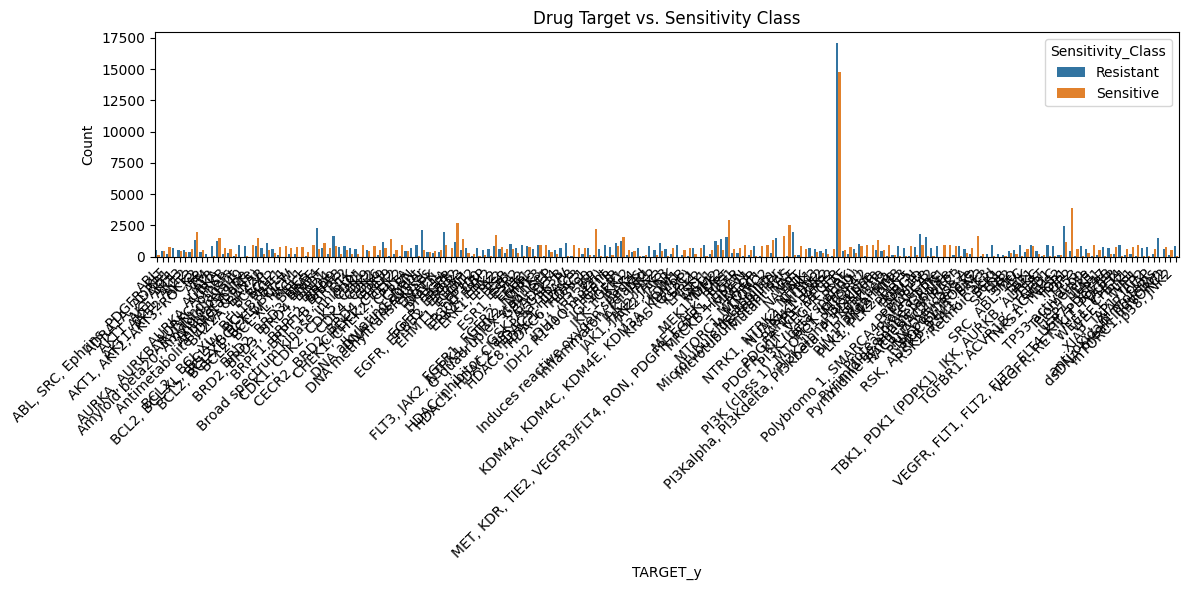

In [11]:
# Count sensitivity/resistance per drug target

target_sensitivity = df_cleaned.groupby(['TARGET_y', 'Sensitivity_Class']).size().reset_index(name='Count')
target_counts = target_sensitivity.groupby('TARGET_y')['Count'].sum().reset_index(name='Total')
valid_targets = target_counts[target_counts['Total'] >= 1000]['TARGET_y']
filtered_target_sensitivity = target_sensitivity[target_sensitivity['TARGET_y'].isin(valid_targets)]


plt.figure(figsize=(12, 6))
sns.barplot(data=target_sensitivity, x='TARGET_y', y='Count', hue='Sensitivity_Class')
plt.xticks(rotation=45, ha='right')
plt.title('Drug Target vs. Sensitivity Class')
plt.tight_layout()
plt.show()

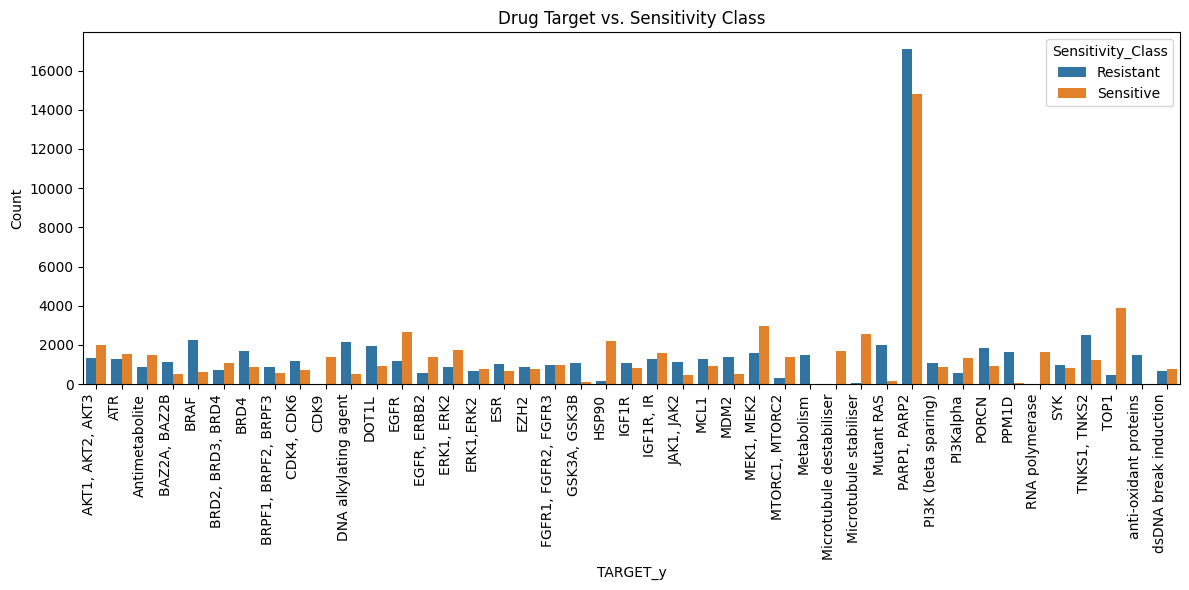

In [12]:
# Filter to only targets with total count > 2500
target_counts = target_sensitivity.groupby('TARGET_y')['Count'].sum().reset_index(name='Total')
valid_targets = target_counts[target_counts['Total'] >= 1000]['TARGET_y']
filtered_target_sensitivity = target_sensitivity[target_sensitivity['TARGET_y'].isin(valid_targets)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_target_sensitivity, x='TARGET_y', y='Count', hue='Sensitivity_Class')
plt.xticks(rotation=90, ha='right')
plt.title('Drug Target vs. Sensitivity Class')
plt.tight_layout()
plt.show()

In [13]:
# Calculate sensitivity ratio per target - ~1 = mostly sensitivie, ~0 = mostly resistant, ~0.5 = evenly split (less predictive)
# later, will one-hot encode target_y as a numeric feature using this sensitivity ratio
pivoted = target_sensitivity.pivot(index='TARGET_y', columns='Sensitivity_Class', values='Count').fillna(0)
pivoted['Sensitivity_Ratio'] = pivoted['Sensitive'] / (pivoted['Resistant'] + pivoted['Sensitive'])
pivoted = pivoted.sort_values('Sensitivity_Ratio', ascending=False)
pivoted

Sensitivity_Class,Resistant,Sensitive,Sensitivity_Ratio
TARGET_y,,,
BIRC5,0.0,958.0,1.000000
RNA polymerase,0.0,1659.0,1.000000
MTORC1,0.0,950.0,1.000000
KSP11,0.0,713.0,1.000000
Proteasome,0.0,957.0,1.000000
...,...,...,...
GADD34,714.0,3.0,0.004184
CP11A,715.0,2.0,0.002789
Inflammatory related,892.0,1.0,0.001120


In [14]:
# Proportion of sensitivity or resistance per drug-target pair
grouped = df_cleaned.groupby(['DRUG_NAME_x', 'TARGET_y', 'Sensitivity_Class']).size().reset_index(name='Count')
pivot = grouped.pivot(index=['DRUG_NAME_x', 'TARGET_y'], columns='Sensitivity_Class', values='Count').fillna(0)
pivot['Total'] = pivot['Sensitive'] + pivot['Resistant']
pivot['Sensitivity_Ratio'] = pivot['Sensitive'] / pivot['Total']
pivot['Resistance_Ratio'] = pivot['Resistant'] / pivot['Total']
pivot = pivot.sort_values('Total', ascending=False)
pivot = pivot.reset_index()
pivot

Sensitivity_Class,DRUG_NAME_x,TARGET_y,Resistant,Sensitive,Total,Sensitivity_Ratio,Resistance_Ratio
0,Ulixertinib,"ERK1, ERK2",556.0,1142.0,1698.0,0.672556,0.327444
1,Oxaliplatin,DNA alkylating agent,1194.0,490.0,1684.0,0.290974,0.709026
2,Fulvestrant,ESR,1026.0,654.0,1680.0,0.389286,0.610714
3,Selumetinib,"MEK1, MEK2",1051.0,615.0,1666.0,0.369148,0.630852
4,Dactinomycin,RNA polymerase,0.0,1659.0,1659.0,1.000000,0.000000
...,...,...,...,...,...,...,...
281,Elesclomol,HSP90,0.0,225.0,225.0,1.000000,0.000000
282,SL0101,"RSK, AURKB, PIM1, PIM3",216.0,9.0,225.0,0.040000,0.960000
283,Bicalutamide,AR,214.0,11.0,225.0,0.048889,0.951111
284,CCT-018159,HSP90,118.0,107.0,225.0,0.475556,0.524444


In [15]:
# Filter for a specific target
pivot[pivot['TARGET_y'] == 'EGFR'].sort_values('Sensitivity_Ratio', ascending=False)

Sensitivity_Class,DRUG_NAME_x,TARGET_y,Resistant,Sensitive,Total,Sensitivity_Ratio,Resistance_Ratio
81,Osimertinib,EGFR,82.0,875.0,957.0,0.914316,0.085684
22,AZD3759,EGFR,231.0,735.0,966.0,0.760870,0.239130
87,Erlotinib,EGFR,359.0,596.0,955.0,0.624084,0.375916
56,Gefitinib,EGFR,484.0,474.0,958.0,0.494781,0.505219


<ipython-input-16-93ed666fee13>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='DRUG_NAME_x', y='Avg_LN_IC50', palette='coolwarm')


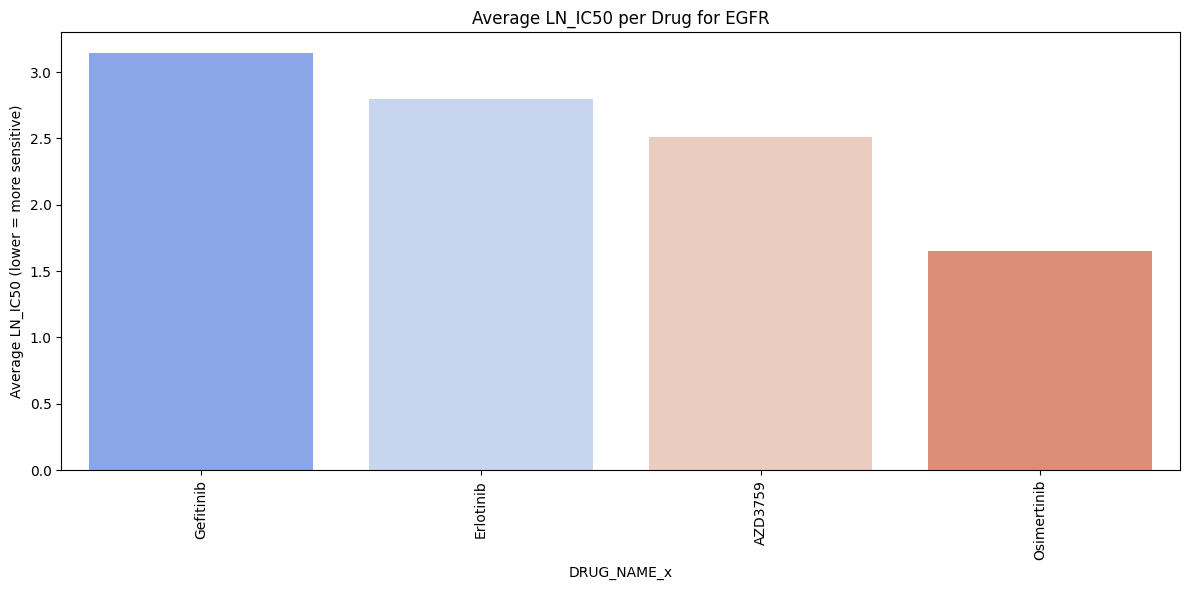

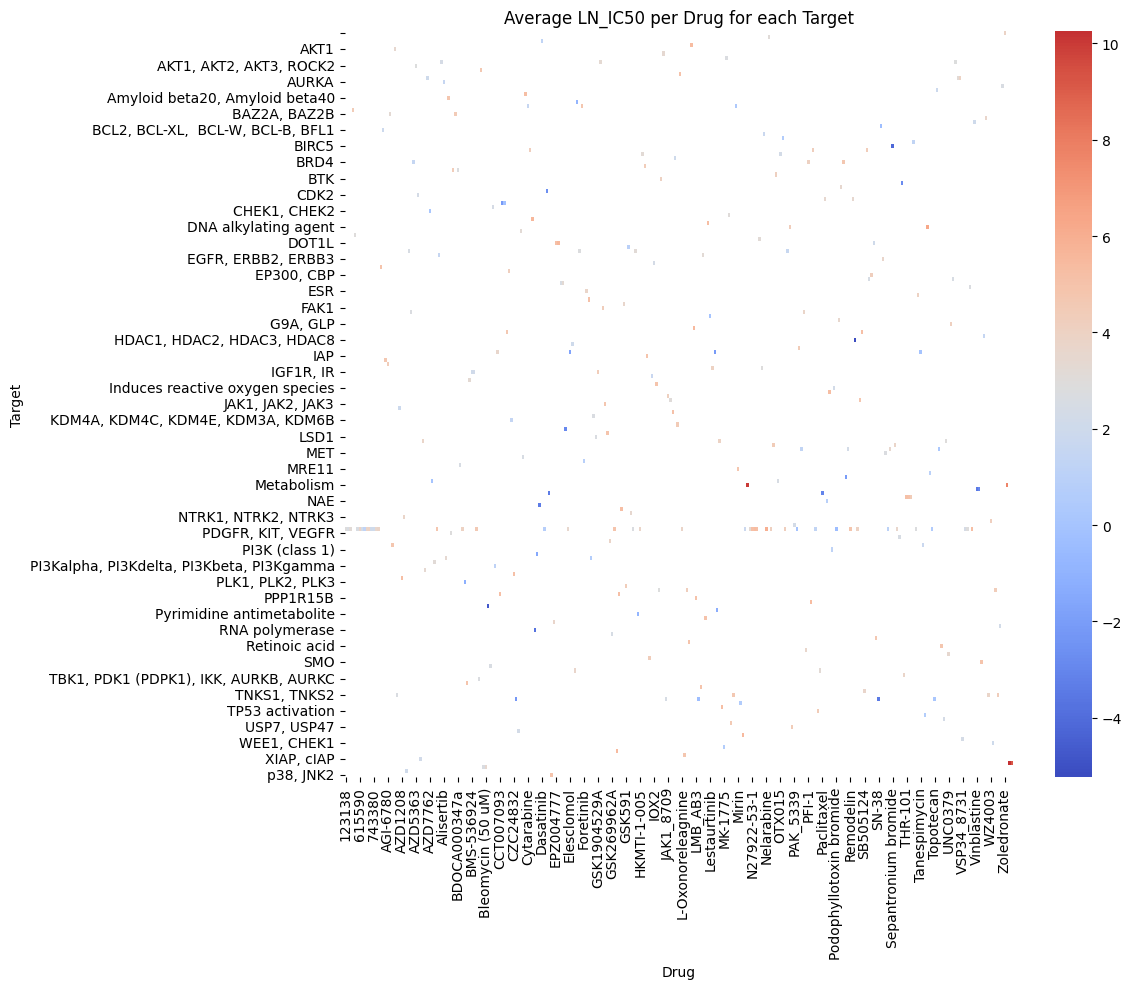

In [16]:
# Relating ln_IC50 to Sensitivity (lower ln_IC50 = more sensitive) for Drug-Target Pairs

avg_ic50_df = df_cleaned.groupby(['DRUG_NAME_x', 'TARGET_y'])['LN_IC50'].mean().reset_index()
avg_ic50_df.rename(columns={'LN_IC50': 'Avg_LN_IC50'}, inplace=True)

# Filter per target; EGFR as an example
target_of_interest = 'EGFR'
plot_df = avg_ic50_df[avg_ic50_df['TARGET_y'] == target_of_interest]
plot_df = plot_df.sort_values('Avg_LN_IC50', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='DRUG_NAME_x', y='Avg_LN_IC50', palette='coolwarm')
plt.xticks(rotation=90)
plt.title(f'Average LN_IC50 per Drug for {target_of_interest}')
plt.ylabel('Average LN_IC50 (lower = more sensitive)')
plt.tight_layout()
plt.show()

ic50_matrix = avg_ic50_df.pivot(index='TARGET_y', columns='DRUG_NAME_x', values='Avg_LN_IC50')
plt.figure(figsize=(12, 10))
sns.heatmap(ic50_matrix, cmap = 'coolwarm', center = ic50_matrix.mean().mean())
plt.xlabel('Drug')
plt.ylabel('Target')
plt.title('Average LN_IC50 per Drug for each Target')
plt.tight_layout()
plt.show()



In [17]:
df_cleaned.columns

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME_x',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium_x',
       'Growth Properties_x', 'CNA', 'Gene Expression_x', 'Methylation_x',
       'TARGET_x', 'TARGET_PATHWAY_x', 'Sample Name',
       'Whole Exome Sequencing (WES)', 'Copy Number Alterations (CNA)',
       'Gene Expression_y', 'Methylation_y', 'Drug_Response',
       'GDSC_Tissue_Descriptor_1', 'GDSC_Tissue_Descriptor_2',
       'Cancer_Type_TCGA_Label', 'MSI_Status', 'Screen Medium_y',
       'Growth Properties_y', 'SCREENING_SITE', 'DRUG_NAME_y', 'SYNONYMS',
       'TARGET_y', 'TARGET_PATHWAY_y', 'Sensitivity_Class'],
      dtype='object')

In [18]:
df_cleaned.dtypes

,0
COSMIC_ID,int64
CELL_LINE_NAME,object
TCGA_DESC,object
DRUG_ID,int64
DRUG_NAME_x,object
LN_IC50,float64
AUC,float64
Z_SCORE,float64
GDSC Tissue descriptor 1,object
GDSC Tissue descriptor 2,object


In [19]:
# One Hot Encoder for Categorical Columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder

encode_df = df_cleaned.copy()

# binary features - 2 unique values
binary_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2]
for col in binary_cols:
  df_cleaned[col] = (df_cleaned[col] == df_cleaned[col].unique()[0]).astype(int)

# low cardinality features - 3 unique values
onehot_cols = ['Growth Properties_y']
onehot_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df_cleaned[onehot_cols])
onehot_columns = onehot_encoder.get_feature_names_out(onehot_cols)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns, index=df_cleaned.index)

# high cardinality features - > 3 unique values
target_cols = ['DRUG_NAME_y', 'GDSC_Tissue_Descriptor_1', 'GDSC_Tissue_Descriptor_2',
          'Cancer_Type_TCGA_Label', 'TARGET_y', 'TARGET_PATHWAY_y']
target_encoder = TargetEncoder()
df_target_encoded = pd.DataFrame(target_encoder.fit_transform(df_cleaned[target_cols], df_cleaned['LN_IC50']), columns=target_cols, index=df_cleaned.index)



label_cols = ['DRUG_ID', 'COSMIC_ID', 'CELL_LINE_NAME']
label_encoder = LabelEncoder()
df_label_encoded = df_cleaned[label_cols].apply(label_encoder.fit_transform)

temp = pd.concat([df_cleaned[binary_cols], df_onehot, df_target_encoded, df_label_encoded], axis=1)
temp

,Microsatellite instability Status (MSI),Screen Medium_x,CNA,Gene Expression_x,Methylation_x,Copy Number Alterations (CNA),Gene Expression_y,Methylation_y,Drug_Response,MSI_Status,...,Growth Properties_y_Suspension,DRUG_NAME_y,GDSC_Tissue_Descriptor_1,GDSC_Tissue_Descriptor_2,Cancer_Type_TCGA_Label,TARGET_y,TARGET_PATHWAY_y,DRUG_ID,COSMIC_ID,CELL_LINE_NAME
0,1,1,1,1,1,1,1,1,1,1,...,0.0,-2.304341,3.112289,2.467569,2.467569,-0.742645,2.086574,0,0,736
1,1,1,1,1,1,1,1,1,1,1,...,0.0,-2.304341,2.658787,2.348115,2.702088,-0.742645,2.086574,0,2,199
2,1,1,1,1,1,1,1,1,1,1,...,0.0,-2.217161,2.694202,2.396706,2.711281,-0.744374,2.089215,0,3,201
3,1,1,1,1,1,1,1,1,1,1,...,0.0,-2.208801,2.698138,2.378381,2.720580,-0.757765,2.088533,0,4,209
4,1,1,1,1,1,1,1,1,1,1,...,0.0,-2.304341,2.658787,2.348115,2.702088,-0.742645,2.086574,0,5,806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242031,0,1,1,1,1,1,1,1,1,0,...,0.0,9.976524,3.125998,3.125998,3.125998,8.790444,4.708057,294,964,845
242032,1,1,1,1,1,1,1,1,1,1,...,0.0,9.976524,3.125998,3.125998,3.125998,8.790444,4.708057,294,965,849
242033,0,1,1,1,1,1,1,1,1,0,...,0.0,10.003652,3.097445,3.097445,3.097445,8.834417,4.713457,294,967,853
242034,1,1,1,1,1,1,0,1,1,1,...,0.0,9.976205,3.120716,3.120716,3.120716,8.823725,4.715798,294,968,177


In [20]:
# Start dataset split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = temp.drop(columns=['Sensitivity_Class', 'GDSC_Tissue_Descriptor_1', 'GDSC_Tissue_Descriptor_2'])
y_class = temp['Sensitivity_Class']
y_regress = df_cleaned['LN_IC50']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regress, test_size=0.2, random_state=42)

num_cols = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X_train_c[num_cols] = scaler.fit_transform(X_train_c[num_cols])
X_test_c[num_cols] = scaler.fit_transform(X_test_c[num_cols])

X_train_r[num_cols] = scaler.fit_transform(X_train_r[num_cols])
X_test_r[num_cols] = scaler.fit_transform(X_test_r[num_cols])

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

lasso_r = LassoCV(cv=5)
lasso_r.fit(X_train_r, y_train_r)
y_pred_r = lasso_r.predict(X_test_r)

print("Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))
print("R-squared:", r2_score(y_test_r, y_pred_r))
print(f"Best alpha value from LassoCV for regression: {lasso_r.alpha_}")

Mean Squared Error: 1.8874110673262496
R-squared: 0.7536391579419066
Best alpha value from LassoCV for regression: 0.0023317108212531244


In [23]:
from sklearn.linear_model import LogisticRegressionCV
log_reg = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000)
log_reg.fit(X_train_c, y_train_c)
y_pred_c = log_reg.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)

print(f"Best C value from LogisticRegressionCV: {log_reg.C_}")
print("Accuracy - Lasso:", accuracy_score(y_test_c, y_pred_c))

Best C value from LogisticRegressionCV: [0.04641589]
Accuracy - Lasso: 0.8192034374483557


In [24]:
# Train baseline models - regression
from sklearn.linear_model import LinearRegression

model_r = LinearRegression()
model_r.fit(X_train_r, y_train_r)

y_pred_r = model_r.predict(X_test_r)
print("Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))
print("R-squared:", r2_score(y_test_r, y_pred_r))

Mean Squared Error: 1.886997419814775
R-squared: 0.7536931507106289


In [25]:
# Train baseline models - classification
from sklearn.ensemble import RandomForestClassifier
model_c = RandomForestClassifier()
model_c.fit(X_train_c, y_train_c)

y_pred_c = model_c.predict(X_test_c)
print("Accuracy - RandomForestClassifier:", accuracy_score(y_test_c, y_pred_c))
print("R-squared:", r2_score(y_test_r, y_pred_r))

Accuracy - RandomForestClassifier: 0.8324863658899355
R-squared: 0.7536931507106289


In [26]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()
model_logreg.fit(X_train_c, y_train_c)

y_pred_logreg = model_logreg.predict(X_test_c)
print("Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))
print("R-squared:", r2_score(y_test_r, y_pred_r))

Mean Squared Error: 1.886997419814775
R-squared: 0.7536931507106289


In [ ]:
df[df.select_dtypes(exclude='number').columns].apply(lambda col: col.str.contains('DLBC', na=False)).any()

In [ ]:
"""import itertools
feature_columns = X.columns
best_r2 = -float('inf')
best_subset = None

for size in range(1, len(feature_columns) + 1):
  for subset in itertools.combinations(feature_columns, size):
    X_train_c_subset = X_train_c[list(subset)]
    X_test_c_subset = X_test_c[list(subset)]

    model_c = RandomForestClassifier()
    model_c.fit(X_train_c_subset, y_train_c)
    y_pred_c_subset = model_c.predict(X_test_c_subset)

    r2 = r2_score(y_test_c, y_pred_c_subset)

    if r2 > best_r2:
      best_r2 = r2
      best_subset = subset

print(f"Best subset of columns: {best_subset}")
print(f"Best R^2 value: {best_r2}")"""

In [ ]:
"""best_r2_r = -float('inf')
best_subset_r = None

for size in range(1, len(feature_columns) + 1):
  for subset in itertools.combinations(feature_columns, size):
    X_train_r_subset = X_train_r[list(subset)]
    X_test_r_subset = X_test_r[list(subset)]

    model_r = LinearRegression()
    model_r.fit(X_train_r_subset, y_train_r)
    y_pred_r_subset = model_r.predict(X_test_r_subset)

    r2_r = r2_score(y_test_r, y_pred_r_subset)

    if r2 > best_r2_r:
      best_r2_r = r2
      best_subset_r = subset

print(f"Best subset of columns: {best_subset}")
print(f"Best R^2 value: {best_r2}")"""